# IS 784 Assignment1


## Discussion



In the first part of the assignment, I have filled necessary parts, and obtained a result. I have used "basic_english" tokenizer instead of "spacy" tokenizer because "spacy" tokenizer was taking too much time when it is compared to "basic_english" tokenizer
In the second part, I have tested it with
only stemming, only with lemmatization and lemmatization-removing stop words.


*   **Only stemming :** I have used SnowballStemmer from nltk and obtained 62.62% accuracy with it.
*   **Only lemmatization :** I have used WordNetLemmatizer again from nltk and obtained 62.82% accuracy.
*   **Lemmatization and Removing Stop Words :** In this part, I have removed stop words like 'the' from the tokens because the most of the frequenciest words were stop words. Accuracy was 65.84%.

In the third part:
* **Different Embedding Size :** I have tried with [100, 200, 300, 1000, 3000] embedding sizes. The best one is gotten with embedding_size = 1000.
* **Reducing Vocabulary Size :** I have tried with most frequent [1000, 2000, 3000, 10000, 30000,100000] words. And the best accuracies are gotten with 10000 and 100000. However, training time has increased when vocabulary size increased. Therefore, I have choosen 10000 as best vocabulary size for this dataset.
* **Pretrained Weights :** With the pretrained weights, accuracy has increased significantly, and because of already pretrained weights training time has decreased. Therefore, using pretrained weigths has very good results for this dataset.
* **Change Depth of the Network :** When the depth of the network has increased, accuracy also increased for pretrained weigths. But increase on the accuracy was very low for using it because it also increased training time. However if the pretrained results were not used, increase on the depth would impact on accuracy significantly.




In [43]:
CUDA_LAUNCH_BLOCKING="1"

In [44]:
import torch
print(torch.__version__) #version of the pytorh
import torch.nn.functional as F
import torchtext.legacy as torchtext
import random

## Fill Here ##   Add any library that is needed for preprocessing steps
from torchtext.data.utils import get_tokenizer
import nltk # in order to stemming and lemmatization
nltk.download('wordnet')
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer # in order to delete punctuations
nltk.download('punkt')
import matplotlib.pyplot as plt



1.8.1+cu101
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Finding Max Length 


First thing we need to do is finding the max length of the text in the dataset because our input size is constant.

In [45]:
## In this cell create "tokenize_fn" that takes text and returns tokens
##Example
## def tokenize_fn(text):
##   tokens = do_tokenize(text)
##   return tokens

##Fill here##

# I have choosed "basic english" as tokenizer because process with "spacy" was taking so long.
def tokenize_fn(text):
  tokenizer = get_tokenizer("basic_english")
  tokens = tokenizer(text)
  return tokens

In [46]:
TEXT = torchtext.data.Field(tokenize= tokenize_fn, batch_first=True) # preprocessing paraneters can be used to add aditional  preprocessing steps
LABEL = torchtext.data.LabelField(dtype = torch.float)

In [47]:
train_data, test_data = torchtext.datasets.IMDB.splits(TEXT, LABEL)

In [48]:
max_size=0  ## this part of the code find maximum length of the network
count=0
sum= 0
for i in  range(len(train_data)):
  if max_size < len(train_data[i].text):
    max_size =len(train_data[i].text)
    print(max_size)
  count +=1
  sum +=len(train_data[i].text)
print("avarage: ", sum/count)

206
712
1086
1096
1128
1160
1299
2022
2752
avarage:  270.68748


### Training Embeddings

We just have found the max length corpus. Now let's create our train and test datasets.

In [49]:
TEXT = torchtext.data.Field(tokenize=tokenize_fn, batch_first=True,fix_length= max_size # it is filled with max size 
                            ) # preprocessing parameters can be used to add aditional  preprocessing steps
LABEL = torchtext.data.LabelField(dtype = torch.float)
train_data, test_data = torchtext.datasets.IMDB.splits(TEXT, LABEL) 
print("train length is: ",len(train_data))
print("test length is: ",len(test_data))
print(vars(train_data[0]))

train length is:  25000
test length is:  25000
{'text': ['alex', 'winter', 'and', 'keanu', 'reeves', 'return', 'as', 'the', 'two', 'dopes', 'from', 'san', 'dimas', 'who', 'get', 'sent', 'on', 'another', 'trip', 'of', 'a', 'lifetime', 'as', 'someone', 'from', 'the', 'future', 'feels', 'exactly', 'the', 'opposite', 'the', 'way', 'it', 'was', 'presented', 'in', 'the', 'first', 'movie', '.', 'the', 'only', 'difference', 'is', 'that', 'their', 'trip', 'is', 'somewhere', 'between', 'heaven', 'and', 'hell', 'and', 'ends', 'up', 'being', 'both', '.', 'when', 'they', 'meet', 'the', 'grim', 'reaper', ',', 'they', 'get', 'the', 'chance', 'of', 'an', 'after-lifetime', 'to', 'play', 'him', 'for', 'a', 'chance', 'to', 'return', 'and', 'stop', 'two', 'evil', 'robots', 'from', 'ruining', 'what', 'future', 'they', 'were', 'supposed', 'to', 'have', '.', 'besides', 'playing', 'roles', 'they', 'have', '.', '.', '.', 'er', '.', '.', '.', 'perfected', ',', 'they', 'also', 'play', '(', 'and', 'revive', 'a', 

In [50]:
TEXT.build_vocab(train_data)
LABEL.build_vocab(train_data)

In [51]:
print("Unique tokens in TEXT vocabulary:",len(TEXT.vocab))
print("Unique tokens in LABEL vocabulary:",len(LABEL.vocab))
print(TEXT.vocab.freqs.most_common(20))
print(LABEL.vocab.freqs)
print(TEXT.unk_token)
print(TEXT.pad_token)

Unique tokens in TEXT vocabulary: 100684
Unique tokens in LABEL vocabulary: 2
[('the', 335746), ('.', 327192), (',', 276280), ('and', 163290), ('a', 162473), ('of', 145437), ('to', 135208), ("'", 133857), ('is', 107221), ('it', 96024), ('in', 93307), ('i', 87401), ('this', 75878), ('that', 73153), ('s', 62933), ('was', 48170), ('as', 46807), ('for', 44116), ('with', 44041), ('movie', 43421)]
Counter({'pos': 12500, 'neg': 12500})
<unk>
<pad>


In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

##Create a train and test iterators using Bucket iterator method with batch size 32
train_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data, test_data), batch_size=32, device=device)

Let's create our network;

In [53]:
class Network(torch.nn.Module):
    def __init__(self,pad_idx):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings = len(TEXT.vocab), embedding_dim =100,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
        self.layer1 = torch.nn.Linear(max_size*100,1)

    def forward(self, x):
        x = self.embedding(x).view(x.size(0),-1)
        x = self.layer1(x)
        return x       

In [54]:
model = Network(pad_idx = TEXT.vocab.stoi[TEXT.pad_token])
print(model)

Network(
  (embedding): Embedding(100684, 100, padding_idx=1)
  (layer1): Linear(in_features=275200, out_features=1, bias=True)
)


In [55]:
# Choose a Loss function from torch.nn according to your network
loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 

#Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.0001)  ## Fill here##

In [56]:
model = model.to(device)
loss_fn = loss_fn.to(device)

We can train our network now.

In [57]:
def accuracy_fn(predictions, labels):  ## create a accuraccy function for further use
  correct = (torch.round(torch.sigmoid(predictions)) == batch.label.squeeze(0)).float() 
  accuracy = correct.sum() / len(correct)  ##Fill here
  return accuracy

In [58]:
import time
# Training loop
N_EPOCHS = 2

tr_loss = []
model.train()

for epoch in range(N_EPOCHS):
    
    # Calculate training time
    start_time = time.time()

    epoch_loss = 0
    epoch_acc = 0

    
    batch_no = 0
    for batch in train_iterator:
        predictions = model(batch.text).squeeze(1)
        loss = loss_fn(predictions, batch.label.squeeze(0))
        ###Fill Here###
        # Reset the gradients
        optimizer.zero_grad()
        # Backprop 
        loss.backward()  
        # Optimize the weights
        optimizer.step()
        ##################################

        # Record accuracy and loss
        epoch_loss += loss.item()

        acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
        epoch_acc +=acc.item()

        batch_no = batch_no +1
        
        
    
    train_loss = epoch_loss / len(train_iterator)

    end_time = time.time()

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    
    print('\n')    
    print(f'Epoch: {epoch+1:2} | Epoch Time: {elapsed_mins}m {elapsed_secs}s')
    print(f'\tAvarage Train Loss: {train_loss:.3f} ')
    print('\n') 



Epoch:  1 | Epoch Time: 0m 14s
	Avarage Train Loss: 0.672 




Epoch:  2 | Epoch Time: 0m 14s
	Avarage Train Loss: 0.452 




In [59]:
test_epoch_loss = 0
test_epoch_acc = 0

# Turm on evalutaion mode
model.eval()

# No need to backprop in eval
with torch.no_grad():

    for batch in test_iterator:

        test_predictions = model(batch.text).squeeze(1)
        
        test_loss = loss_fn(test_predictions, batch.label)

        test_epoch_loss += test_loss.item()
        
        acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
        test_epoch_acc +=acc.item()

test_loss = test_epoch_loss/len(test_iterator)
test_acc = test_epoch_acc  / len(test_iterator)
print(f'Test Loss: {test_loss:.3f} | | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.649 | | Test Acc: 63.50%


## Part 2

### Part2-A : With Stemming

In [60]:
def my_stemmer(text):
  stems = []
  stemmer = nltk.stem.SnowballStemmer('english') 
  for token in text:
    token = stemmer.stem(token)
    if token != "":
      stems.append(token)
  return stems 

In [61]:
TEXT_STEM = torchtext.data.Field(tokenize= tokenize_fn, batch_first=True, preprocessing = my_stemmer, fix_length = max_size) # preprocessing paraneters can be used to add aditional  preprocessing steps
LABEL_STEM = torchtext.data.LabelField(dtype = torch.float)
train_data_stemming, test_data_stemming = torchtext.datasets.IMDB.splits(TEXT_STEM, LABEL_STEM) 
print("train length is: ",len(train_data_stemming))
print("test length is: ",len(test_data_stemming))
print(vars(train_data_stemming[0]))

train length is:  25000
test length is:  25000
{'text': ['alex', 'winter', 'and', 'keanu', 'reev', 'return', 'as', 'the', 'two', 'dope', 'from', 'san', 'dima', 'who', 'get', 'sent', 'on', 'anoth', 'trip', 'of', 'a', 'lifetim', 'as', 'someon', 'from', 'the', 'futur', 'feel', 'exact', 'the', 'opposit', 'the', 'way', 'it', 'was', 'present', 'in', 'the', 'first', 'movi', '.', 'the', 'onli', 'differ', 'is', 'that', 'their', 'trip', 'is', 'somewher', 'between', 'heaven', 'and', 'hell', 'and', 'end', 'up', 'be', 'both', '.', 'when', 'they', 'meet', 'the', 'grim', 'reaper', ',', 'they', 'get', 'the', 'chanc', 'of', 'an', 'after-lifetim', 'to', 'play', 'him', 'for', 'a', 'chanc', 'to', 'return', 'and', 'stop', 'two', 'evil', 'robot', 'from', 'ruin', 'what', 'futur', 'they', 'were', 'suppos', 'to', 'have', '.', 'besid', 'play', 'role', 'they', 'have', '.', '.', '.', 'er', '.', '.', '.', 'perfect', ',', 'they', 'also', 'play', '(', 'and', 'reviv', 'a', 'coupl', 'of', 'extra', 'sale', 'in', 'the',

In [62]:
TEXT_STEM.build_vocab(train_data_stemming)
LABEL_STEM.build_vocab(train_data_stemming)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
##Create a train and test iterators using Bucket iterator method with batch size 32
train_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data_stemming, test_data_stemming), batch_size=32, device=device)

class Network(torch.nn.Module):
    def __init__(self,pad_idx):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings = len(TEXT_STEM.vocab), embedding_dim =100,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
        self.layer1 = torch.nn.Linear(max_size*100,1)

    def forward(self, x):
        x = self.embedding(x).view(x.size(0),-1)
        x = self.layer1(x)
        return x       

model = Network(pad_idx = TEXT_STEM.vocab.stoi[TEXT_STEM.pad_token])
print(model)

# Choose a Loss function from torch.nn according to your network
loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 

#Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.0001)  ## Fill here##

model = model.to(device)
loss_fn = loss_fn.to(device)

def accuracy_fn(predictions, labels):  ## create a accuraccy function for further use
  correct = (torch.round(torch.sigmoid(predictions)) == batch.label.squeeze(0)).float() 
  accuracy = correct.sum() / len(correct)  ##Fill here
  return accuracy

import time
# Training loop
N_EPOCHS = 2

tr_loss = []
model.train()

for epoch in range(N_EPOCHS):
    
    # Calculate training time
    start_time = time.time()

    epoch_loss = 0
    epoch_acc = 0

    
    batch_no = 0
    for batch in train_iterator:
        predictions = model(batch.text).squeeze(1)
        loss = loss_fn(predictions, batch.label.squeeze(0))
        ###Fill Here###
        # Reset the gradients
        optimizer.zero_grad()
        # Backprop 
        loss.backward()  
        # Optimize the weights
        optimizer.step()
        ##################################

        # Record accuracy and loss
        epoch_loss += loss.item()

        acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
        epoch_acc +=acc.item()

        batch_no = batch_no +1
        

    
    train_loss = epoch_loss / len(train_iterator)

    end_time = time.time()

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    
    print('\n')    
    print(f'Epoch: {epoch+1:2} | Epoch Time: {elapsed_mins}m {elapsed_secs}s')
    print(f'\tAvarage Train Loss: {train_loss:.3f} ')
    print('\n') 

test_epoch_loss = 0
test_epoch_acc = 0

# Turm on evalutaion mode
model.eval()

# No need to backprop in eval
with torch.no_grad():

    for batch in test_iterator:

        test_predictions = model(batch.text).squeeze(1)
        
        test_loss_stem = loss_fn(test_predictions, batch.label)

        test_epoch_loss += test_loss_stem.item()
        
        acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
        test_epoch_acc +=acc.item()

test_loss_stem = test_epoch_loss/len(test_iterator)
test_acc_stem = test_epoch_acc  / len(test_iterator)
print(f'Test Loss: {test_loss_stem:.3f} | | Test Acc: {test_acc_stem*100:.2f}%')

Network(
  (embedding): Embedding(75641, 100, padding_idx=1)
  (layer1): Linear(in_features=275200, out_features=1, bias=True)
)


Epoch:  1 | Epoch Time: 0m 12s
	Avarage Train Loss: 0.667 




Epoch:  2 | Epoch Time: 0m 13s
	Avarage Train Loss: 0.447 


Test Loss: 0.646 | | Test Acc: 64.13%


### Part2-B: With Lemmatization

In [63]:
def my_lemmatization(text):
  lemmas = []
  lemmatize = nltk.stem.WordNetLemmatizer() 
  for token in text:
    token = lemmatize.lemmatize(token)
    if token != "":
      lemmas.append(token)
  return lemmas 

In [64]:
TEXT_LEMMA = torchtext.data.Field(tokenize= tokenize_fn, batch_first=True, preprocessing = my_lemmatization, fix_length = max_size) # preprocessing paraneters can be used to add aditional  preprocessing steps
LABEL_LEMMA = torchtext.data.LabelField(dtype = torch.float)
train_data_lemma, test_data_lemma = torchtext.datasets.IMDB.splits(TEXT_LEMMA, LABEL_LEMMA) 
print("train length is: ",len(train_data_lemma))
print("test length is: ",len(test_data_lemma))
print(vars(train_data_lemma[0]))

train length is:  25000
test length is:  25000
{'text': ['alex', 'winter', 'and', 'keanu', 'reef', 'return', 'a', 'the', 'two', 'dope', 'from', 'san', 'dimas', 'who', 'get', 'sent', 'on', 'another', 'trip', 'of', 'a', 'lifetime', 'a', 'someone', 'from', 'the', 'future', 'feel', 'exactly', 'the', 'opposite', 'the', 'way', 'it', 'wa', 'presented', 'in', 'the', 'first', 'movie', '.', 'the', 'only', 'difference', 'is', 'that', 'their', 'trip', 'is', 'somewhere', 'between', 'heaven', 'and', 'hell', 'and', 'end', 'up', 'being', 'both', '.', 'when', 'they', 'meet', 'the', 'grim', 'reaper', ',', 'they', 'get', 'the', 'chance', 'of', 'an', 'after-lifetime', 'to', 'play', 'him', 'for', 'a', 'chance', 'to', 'return', 'and', 'stop', 'two', 'evil', 'robot', 'from', 'ruining', 'what', 'future', 'they', 'were', 'supposed', 'to', 'have', '.', 'besides', 'playing', 'role', 'they', 'have', '.', '.', '.', 'er', '.', '.', '.', 'perfected', ',', 'they', 'also', 'play', '(', 'and', 'revive', 'a', 'couple', 

In [65]:
TEXT_LEMMA.build_vocab(train_data_lemma)
LABEL_LEMMA.build_vocab(train_data_lemma)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
##Create a train and test iterators using Bucket iterator method with batch size 32
train_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data_lemma, test_data_lemma), batch_size=32, device=device)

class Network(torch.nn.Module):
    def __init__(self,pad_idx):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings = len(TEXT_LEMMA.vocab), embedding_dim =100,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
        self.layer1 = torch.nn.Linear(max_size*100,1)

    def forward(self, x):
        x = self.embedding(x).view(x.size(0),-1)
        x = self.layer1(x)
        return x       

model = Network(pad_idx = TEXT_LEMMA.vocab.stoi[TEXT_LEMMA.pad_token])
print(model)

# Choose a Loss function from torch.nn according to your network
loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 

#Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.0001)  ## Fill here##

model = model.to(device)
loss_fn = loss_fn.to(device)

def accuracy_fn(predictions, labels):  ## create a accuraccy function for further use
  correct = (torch.round(torch.sigmoid(predictions)) == batch.label.squeeze(0)).float() 
  accuracy = correct.sum() / len(correct)  ##Fill here
  return accuracy

import time
# Training loop
N_EPOCHS = 2

tr_loss = []
model.train()

for epoch in range(N_EPOCHS):
    
    # Calculate training time
    start_time = time.time()

    epoch_loss = 0
    epoch_acc = 0

    
    batch_no = 0
    for batch in train_iterator:
        predictions = model(batch.text).squeeze(1)
        loss = loss_fn(predictions, batch.label.squeeze(0))
        ###Fill Here###
        # Reset the gradients
        optimizer.zero_grad()
        # Backprop 
        loss.backward()  
        # Optimize the weights
        optimizer.step()
        ##################################

        # Record accuracy and loss
        epoch_loss += loss.item()

        acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
        epoch_acc +=acc.item()

        batch_no = batch_no +1
        

    
    train_loss = epoch_loss / len(train_iterator)

    end_time = time.time()

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    
    print('\n')    
    print(f'Epoch: {epoch+1:2} | Epoch Time with Lemmatization: {elapsed_mins}m {elapsed_secs}s')
    print(f'\tAvarage Train Loss with Lemmatization: {train_loss:.3f} ')
    print('\n') 

test_epoch_loss = 0
test_epoch_acc = 0

# Turm on evalutaion mode
model.eval()

# No need to backprop in eval
with torch.no_grad():

    for batch in test_iterator:

        test_predictions = model(batch.text).squeeze(1)
        
        test_loss_lemma = loss_fn(test_predictions, batch.label)

        test_epoch_loss += test_loss_lemma.item()
        
        acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
        test_epoch_acc +=acc.item()

test_loss_lemma = test_epoch_loss/len(test_iterator)
test_acc_lemma = test_epoch_acc  / len(test_iterator)
print(f'Test Loss with Lemmatization: {test_loss_lemma:.3f} | | Test Acc with Lemmatization: {test_acc_lemma*100:.2f}%')

Network(
  (embedding): Embedding(93055, 100, padding_idx=1)
  (layer1): Linear(in_features=275200, out_features=1, bias=True)
)


Epoch:  1 | Epoch Time with Lemmatization: 0m 13s
	Avarage Train Loss with Lemmatization: 0.675 




Epoch:  2 | Epoch Time with Lemmatization: 0m 13s
	Avarage Train Loss with Lemmatization: 0.458 


Test Loss with Lemmatization: 0.657 | | Test Acc with Lemmatization: 63.13%


### Part2-C: Lemmatization and removing stop word

This module deletes stop words, lemmatize the words

In [66]:
stop_words = set(stopwords.words('english')) 

def my_lemmatization_and_remove_stop_words(text):
  lemmas = []
  lemmatize = nltk.stem.WordNetLemmatizer() 

  for token in text:
    token = lemmatize.lemmatize(token)
    if token != "":
      lemmas.append(token)
  lemmas = [word for word in lemmas if not word in stop_words] 
  return lemmas 

In [67]:
TEXT_C = torchtext.data.Field(tokenize= tokenize_fn, batch_first=True, preprocessing = my_lemmatization_and_remove_stop_words) # preprocessing paraneters can be used to add aditional  preprocessing steps
LABEL_C = torchtext.data.LabelField(dtype = torch.float)

train_data_C, test_data_lemma = torchtext.datasets.IMDB.splits(TEXT_C, LABEL_C)

max_size=0  ## this part of the code find maximum length of the network
count=0
sum= 0
for i in  range(len(train_data_C)):
  if max_size < len(train_data_C[i].text):
    max_size =len(train_data_C[i].text)
    print(max_size)
  count +=1
  sum +=len(train_data_C[i].text)
print("avarage: ", sum/count)

110
364
391
584
591
642
653
676
778
1170
1700
avarage:  156.94716


In [68]:
TEXT_C = torchtext.data.Field(tokenize= tokenize_fn, batch_first=True, preprocessing = my_lemmatization_and_remove_stop_words, fix_length = max_size) # preprocessing paraneters can be used to add aditional  preprocessing steps
LABEL_C = torchtext.data.LabelField(dtype = torch.float)
train_data_C, test_data_C = torchtext.datasets.IMDB.splits(TEXT_C, LABEL_C) 
print("train length is: ",len(train_data_C))
print("test length is: ",len(test_data_C))
print(vars(train_data_C[0]))

train length is:  25000
test length is:  25000
{'text': ['alex', 'winter', 'keanu', 'reef', 'return', 'two', 'dope', 'san', 'dimas', 'get', 'sent', 'another', 'trip', 'lifetime', 'someone', 'future', 'feel', 'exactly', 'opposite', 'way', 'wa', 'presented', 'first', 'movie', '.', 'difference', 'trip', 'somewhere', 'heaven', 'hell', 'end', '.', 'meet', 'grim', 'reaper', ',', 'get', 'chance', 'after-lifetime', 'play', 'chance', 'return', 'stop', 'two', 'evil', 'robot', 'ruining', 'future', 'supposed', '.', 'besides', 'playing', 'role', '.', '.', '.', 'er', '.', '.', '.', 'perfected', ',', 'also', 'play', '(', 'revive', 'couple', 'extra', 'sale', 'process', ')', 'classic', 'game', '(', 'even', 'original', 'copy', 'battleship', 'closet', ')', '.', 'reason', 'liked', 'movie', 'better', 'original', 'deal', 'might', 'like', 'instead', 'wa', '.', 'without', 'spoiling', 'movie', ',', "'", 'give', 'anymore', 'information', '(', 'guess', "'", 'watch', 'decide', '!', '8', '10', 'star', '.'], 'label

In [69]:
TEXT_C.build_vocab(train_data_C)
LABEL_C.build_vocab(train_data_C)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
##Create a train and test iterators using Bucket iterator method with batch size 32
train_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data_C, test_data_C), batch_size=32, device=device)

class Network(torch.nn.Module):
    def __init__(self,pad_idx):
        super().__init__()
        self.embedding = torch.nn.Embedding(num_embeddings = len(TEXT_C.vocab), embedding_dim =100,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
        self.layer1 = torch.nn.Linear(max_size*100,1)

    def forward(self, x):
        x = self.embedding(x).view(x.size(0),-1)
        x = self.layer1(x)
        return x       

model = Network(pad_idx = TEXT_C.vocab.stoi[TEXT_C.pad_token])
print(model)

# Choose a Loss function from torch.nn according to your network
loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 

#Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.0001)  ## Fill here##

model = model.to(device)
loss_fn = loss_fn.to(device)

def accuracy_fn(predictions, labels):  ## create a accuraccy function for further use
  correct = (torch.round(torch.sigmoid(predictions)) == batch.label.squeeze(0)).float() 
  accuracy = correct.sum() / len(correct)  ##Fill here
  return accuracy

import time
# Training loop
N_EPOCHS = 2

tr_loss = []
model.train()

for epoch in range(N_EPOCHS):
    
    # Calculate training time
    start_time = time.time()

    epoch_loss = 0
    epoch_acc = 0

    
    batch_no = 0
    for batch in train_iterator:
        predictions = model(batch.text).squeeze(1)
        loss = loss_fn(predictions, batch.label.squeeze(0))
        ###Fill Here###
        # Reset the gradients
        optimizer.zero_grad()
        # Backprop 
        loss.backward()  
        # Optimize the weights
        optimizer.step()
        ##################################

        # Record accuracy and loss
        epoch_loss += loss.item()

        acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
        epoch_acc +=acc.item()

        batch_no = batch_no +1
        

    
    train_loss = epoch_loss / len(train_iterator)

    end_time = time.time()

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    
    print('\n')    
    print(f'Epoch: {epoch+1:2} | Epoch Time on Part2-C: {elapsed_mins}m {elapsed_secs}s')
    print(f'\tAvarage Train Loss on Part2-C: {train_loss:.3f} ')
    print('\n') 

test_epoch_loss = 0
test_epoch_acc = 0

# Turm on evalutaion mode
model.eval()

# No need to backprop in eval
with torch.no_grad():

    for batch in test_iterator:

        test_predictions = model(batch.text).squeeze(1)
        
        test_loss_C = loss_fn(test_predictions, batch.label)

        test_epoch_loss += test_loss_C.item()
        
        acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
        test_epoch_acc +=acc.item()

test_loss_C = test_epoch_loss/len(test_iterator)
test_acc_C = test_epoch_acc  / len(test_iterator)
print(f'Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_C*100:.2f}%')

Network(
  (embedding): Embedding(92906, 100, padding_idx=1)
  (layer1): Linear(in_features=170000, out_features=1, bias=True)
)


Epoch:  1 | Epoch Time on Part2-C: 0m 9s
	Avarage Train Loss on Part2-C: 0.668 




Epoch:  2 | Epoch Time on Part2-C: 0m 9s
	Avarage Train Loss on Part2-C: 0.499 


Test Loss on Part2-C: 0.616 | | Test Acc on Part2-C: 66.54%


Text(0.5, 1.0, 'Accuracy of the Models')

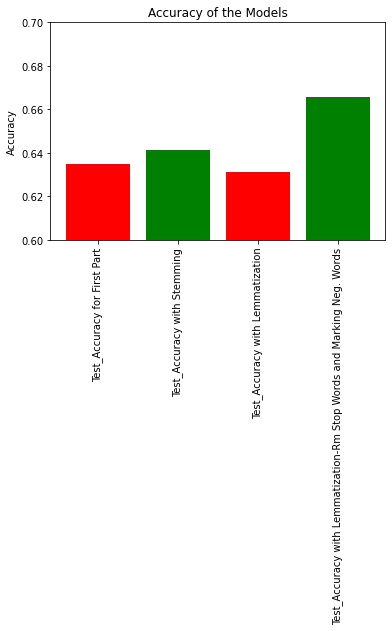

In [70]:
left = [1, 2, 3, 4]
  
height = [test_acc, test_acc_stem, test_acc_lemma, test_acc_C]
  
# labels for bars
tick_label = ['Test_Accuracy for First Part', 'Test_Accuracy with Stemming', 'Test_Accuracy with Lemmatization', 'Test_Accuracy with Lemmatization-Rm Stop Words and Marking Neg. Words']
plt.xticks(rotation=90)

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.ylim([0.6, 0.7])
plt.ylabel("Accuracy")
plt.title("Accuracy of the Models")

As can be seen from the Figure I found the best accuracy from : Part2-C

## Part 3

### With Different Embedding Size

In [71]:
TEXT_C = torchtext.data.Field(tokenize= tokenize_fn, batch_first=True, preprocessing = my_lemmatization_and_remove_stop_words, fix_length = max_size) # preprocessing paraneters can be used to add aditional  preprocessing steps
LABEL_C = torchtext.data.LabelField(dtype = torch.float)
train_data_C, test_data_C = torchtext.datasets.IMDB.splits(TEXT_C, LABEL_C) 

Epoch:  1 | Epoch Time on Part2-C: 0m 9s
Epoch:  2 | Epoch Time on Part2-C: 0m 9s
Embedding Size: 100 || Test Loss on Part2-C: 0.639 | | Test Acc on Part2-C: 63.81%
Epoch:  1 | Epoch Time on Part2-C: 0m 13s
Epoch:  2 | Epoch Time on Part2-C: 0m 12s
Embedding Size: 200 || Test Loss on Part2-C: 0.622 | | Test Acc on Part2-C: 66.74%
Epoch:  1 | Epoch Time on Part2-C: 0m 16s
Epoch:  2 | Epoch Time on Part2-C: 0m 16s
Embedding Size: 300 || Test Loss on Part2-C: 0.615 | | Test Acc on Part2-C: 67.66%
Epoch:  1 | Epoch Time on Part2-C: 0m 41s
Epoch:  2 | Epoch Time on Part2-C: 0m 41s
Embedding Size: 1000 || Test Loss on Part2-C: 0.662 | | Test Acc on Part2-C: 70.55%
Epoch:  1 | Epoch Time on Part2-C: 1m 50s
Epoch:  2 | Epoch Time on Part2-C: 1m 50s
Embedding Size: 3000 || Test Loss on Part2-C: 1.143 | | Test Acc on Part2-C: 69.02%


Text(0.5, 1.0, 'Accuracy of the Models')

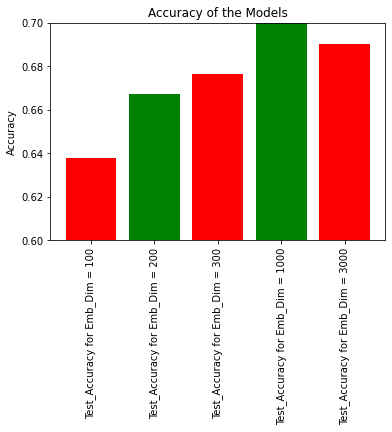

In [72]:
TEXT_C.build_vocab(train_data_C)
LABEL_C.build_vocab(train_data_C)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
##Create a train and test iterators using Bucket iterator method with batch size 32
train_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data_C, test_data_C), batch_size=32, device=device)
emb_dims = [100, 200, 300, 1000, 3000]
for embedding_dims in emb_dims:
  class Network(torch.nn.Module):
      def __init__(self,pad_idx):
          super().__init__()
          self.embedding = torch.nn.Embedding(num_embeddings = len(TEXT_C.vocab), embedding_dim =embedding_dims,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
          self.layer1 = torch.nn.Linear(max_size*embedding_dims,1)

      def forward(self, x):
          x = self.embedding(x).view(x.size(0),-1)
          x = self.layer1(x)
          return x       

  model = Network(pad_idx = TEXT_C.vocab.stoi[TEXT_C.pad_token])
  #print(model)

  # Choose a Loss function from torch.nn according to your network
  loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 

  #Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
  optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.0001)  ## Fill here##

  model = model.to(device)
  loss_fn = loss_fn.to(device)

  def accuracy_fn(predictions, labels):  ## create a accuraccy function for further use
    correct = (torch.round(torch.sigmoid(predictions)) == batch.label.squeeze(0)).float() 
    accuracy = correct.sum() / len(correct)  ##Fill here
    return accuracy

  import time
  # Training loop
  N_EPOCHS = 2

  tr_loss = []
  model.train()

  for epoch in range(N_EPOCHS):
      
      # Calculate training time
      start_time = time.time()

      epoch_loss = 0
      epoch_acc = 0

      
      batch_no = 0
      for batch in train_iterator:
          predictions = model(batch.text).squeeze(1)
          loss = loss_fn(predictions, batch.label.squeeze(0))
          ###Fill Here###
          # Reset the gradients
          optimizer.zero_grad()
          # Backprop 
          loss.backward()  
          # Optimize the weights
          optimizer.step()
          ##################################

          # Record accuracy and loss
          epoch_loss += loss.item()

          acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
          epoch_acc +=acc.item()

          batch_no = batch_no +1

      
      train_loss = epoch_loss / len(train_iterator)

      end_time = time.time()

      elapsed_time = end_time - start_time
      elapsed_mins = int(elapsed_time / 60)
      elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
      
      #print('\n')    
      print(f'Epoch: {epoch+1:2} | Epoch Time on Part2-C: {elapsed_mins}m {elapsed_secs}s')
      #print(f'\tAvarage Train Loss on Part2-C: {train_loss:.3f} ')
      #print('\n') 

  test_epoch_loss = 0
  test_epoch_acc = 0

  # Turm on evalutaion mode
  model.eval()

  # No need to backprop in eval
  with torch.no_grad():

      for batch in test_iterator:

          test_predictions = model(batch.text).squeeze(1)
          
          test_loss_C = loss_fn(test_predictions, batch.label)

          test_epoch_loss += test_loss_C.item()
          
          acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
          test_epoch_acc +=acc.item()

  test_loss_C = test_epoch_loss/len(test_iterator)
  test_acc_C = test_epoch_acc  / len(test_iterator)
  if embedding_dims == 100:
    test_acc_100 = test_epoch_acc  / len(test_iterator)
    print(f'Embedding Size: {embedding_dims} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_100*100:.2f}%')
  if embedding_dims == 200:
    test_acc_200 = test_epoch_acc  / len(test_iterator)
    print(f'Embedding Size: {embedding_dims} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_200*100:.2f}%')
  if embedding_dims == 300:
    test_acc_300 = test_epoch_acc  / len(test_iterator)
    print(f'Embedding Size: {embedding_dims} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_300*100:.2f}%')
  if embedding_dims == 1000:
    test_acc_1000 = test_epoch_acc  / len(test_iterator)
    print(f'Embedding Size: {embedding_dims} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_1000*100:.2f}%')
  if embedding_dims == 3000:
    test_acc_3000 = test_epoch_acc  / len(test_iterator)
    print(f'Embedding Size: {embedding_dims} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_3000*100:.2f}%')
    
left = [1, 2, 3, 4, 5]
  
height = [test_acc_100, test_acc_200, test_acc_300, test_acc_1000, test_acc_3000]
  
# labels for bars
tick_label = ['Test_Accuracy for Emb_Dim = 100', 'Test_Accuracy for Emb_Dim = 200', 'Test_Accuracy for Emb_Dim = 300', 'Test_Accuracy for Emb_Dim = 1000', 'Test_Accuracy for Emb_Dim = 3000']
plt.xticks(rotation=90)

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.ylim([0.6, 0.7])
plt.ylabel("Accuracy")
plt.title("Accuracy of the Models")

*   When the embedding size has increased, also training time is increased.
*   As can be seen from the Figure, Embedding Size with 1000 has increased Test_Accuracy very much. Therefore, the following parts will be trained with embedding_Size = 1000. 



### Eliminating Less Frequent Words

Max vocabulary size of the text vocab is set to different sizes in order to get rid of less frequently used words and their accuracy will be compared.

Epoch:  1 | Epoch Time on Part2-C: 0m 11s
Epoch:  2 | Epoch Time on Part2-C: 0m 11s
Max Vocabulary Size: 1000 || Test Loss on Part2-C: 0.837 | | Test Acc on Part2-C: 68.86%
Epoch:  1 | Epoch Time on Part2-C: 0m 11s
Epoch:  2 | Epoch Time on Part2-C: 0m 11s
Max Vocabulary Size: 2000 || Test Loss on Part2-C: 0.784 | | Test Acc on Part2-C: 69.37%
Epoch:  1 | Epoch Time on Part2-C: 0m 11s
Epoch:  2 | Epoch Time on Part2-C: 0m 11s
Max Vocabulary Size: 3000 || Test Loss on Part2-C: 0.759 | | Test Acc on Part2-C: 69.50%
Epoch:  1 | Epoch Time on Part2-C: 0m 14s
Epoch:  2 | Epoch Time on Part2-C: 0m 14s
Max Vocabulary Size: 10000 || Test Loss on Part2-C: 0.728 | | Test Acc on Part2-C: 68.97%
Epoch:  1 | Epoch Time on Part2-C: 0m 20s
Epoch:  2 | Epoch Time on Part2-C: 0m 21s
Max Vocabulary Size: 30000 || Test Loss on Part2-C: 0.683 | | Test Acc on Part2-C: 70.08%
Epoch:  1 | Epoch Time on Part2-C: 0m 41s
Epoch:  2 | Epoch Time on Part2-C: 0m 41s
Max Vocabulary Size: 100000 || Test Loss on Part2

Text(0.5, 1.0, 'Accuracy of the Models')

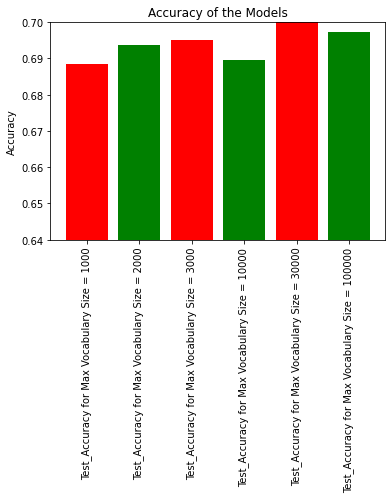

In [73]:
max_vocab_sizes = [1000, 2000, 3000, 10000, 30000,100000]
for max_sizes in max_vocab_sizes:
  TEXT_C.build_vocab(train_data_C, max_size = max_sizes)
  LABEL_C.build_vocab(train_data_C)

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  ##Create a train and test iterators using Bucket iterator method with batch size 32
  train_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data_C, test_data_C), batch_size=32, device=device)
  class Network(torch.nn.Module):
      def __init__(self,pad_idx):
          super().__init__()
          self.embedding = torch.nn.Embedding(num_embeddings = len(TEXT_C.vocab), embedding_dim =1000,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
          self.layer1 = torch.nn.Linear(max_size*1000,1)

      def forward(self, x):
          x = self.embedding(x).view(x.size(0),-1)
          x = self.layer1(x)
          return x       

  model = Network(pad_idx = TEXT_C.vocab.stoi[TEXT_C.pad_token])
  #print(model)

  # Choose a Loss function from torch.nn according to your network
  loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 

  #Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
  optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.0001)  ## Fill here##

  model = model.to(device)
  loss_fn = loss_fn.to(device)

  def accuracy_fn(predictions, labels):  ## create a accuraccy function for further use
    correct = (torch.round(torch.sigmoid(predictions)) == batch.label.squeeze(0)).float() 
    accuracy = correct.sum() / len(correct)  ##Fill here
    return accuracy

  import time
  # Training loop
  N_EPOCHS = 2

  tr_loss = []
  model.train()

  for epoch in range(N_EPOCHS):
      
      # Calculate training time
      start_time = time.time()

      epoch_loss = 0
      epoch_acc = 0

      
      batch_no = 0
      for batch in train_iterator:
          predictions = model(batch.text).squeeze(1)
          loss = loss_fn(predictions, batch.label.squeeze(0))
          ###Fill Here###
          # Reset the gradients
          optimizer.zero_grad()
          # Backprop 
          loss.backward()  
          # Optimize the weights
          optimizer.step()
          ##################################

          # Record accuracy and loss
          epoch_loss += loss.item()

          acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
          epoch_acc +=acc.item()

          batch_no = batch_no +1

      
      train_loss = epoch_loss / len(train_iterator)

      end_time = time.time()

      elapsed_time = end_time - start_time
      elapsed_mins = int(elapsed_time / 60)
      elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
      
      #print('\n')    
      print(f'Epoch: {epoch+1:2} | Epoch Time on Part2-C: {elapsed_mins}m {elapsed_secs}s')
      #print(f'\tAvarage Train Loss on Part2-C: {train_loss:.3f} ')
      #print('\n') 

  test_epoch_loss = 0
  test_epoch_acc = 0

  # Turm on evalutaion mode
  model.eval()

  # No need to backprop in eval
  with torch.no_grad():

      for batch in test_iterator:

          test_predictions = model(batch.text).squeeze(1)
          
          test_loss_C = loss_fn(test_predictions, batch.label)

          test_epoch_loss += test_loss_C.item()
          
          acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
          test_epoch_acc +=acc.item()

  test_loss_C = test_epoch_loss/len(test_iterator)
  test_acc_C = test_epoch_acc  / len(test_iterator)
  if max_sizes == 1000:
    test_acc_100 = test_epoch_acc  / len(test_iterator)
    print(f'Max Vocabulary Size: {max_sizes} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_100*100:.2f}%')
  if max_sizes == 2000:
    test_acc_200 = test_epoch_acc  / len(test_iterator)
    print(f'Max Vocabulary Size: {max_sizes} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_200*100:.2f}%')
  if max_sizes == 3000:
    test_acc_300 = test_epoch_acc  / len(test_iterator)
    print(f'Max Vocabulary Size: {max_sizes} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_300*100:.2f}%')
  if max_sizes == 10000:
    test_acc_1000 = test_epoch_acc  / len(test_iterator)
    print(f'Max Vocabulary Size: {max_sizes} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_1000*100:.2f}%')
  if max_sizes == 30000:
    test_acc_3000 = test_epoch_acc  / len(test_iterator)
    print(f'Max Vocabulary Size: {max_sizes} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_3000*100:.2f}%')
  if max_sizes == 100000:
    test_acc_10000 = test_epoch_acc  / len(test_iterator)
    print(f'Max Vocabulary Size: {max_sizes} || Test Loss on Part2-C: {test_loss_C:.3f} | | Test Acc on Part2-C: {test_acc_10000*100:.2f}%')
    
left = [1, 2, 3, 4, 5, 6]
  
height = [test_acc_100, test_acc_200, test_acc_300, test_acc_1000, test_acc_3000, test_acc_10000]
  
# labels for bars
tick_label = ['Test_Accuracy for Max Vocabulary Size = 1000', 'Test_Accuracy for Max Vocabulary Size = 2000', 'Test_Accuracy for Max Vocabulary Size = 3000', 'Test_Accuracy for Max Vocabulary Size = 10000', 'Test_Accuracy for Max Vocabulary Size = 30000','Test_Accuracy for Max Vocabulary Size = 100000']
plt.xticks(rotation=90)

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.ylim([0.64, 0.7])
plt.ylabel("Accuracy")
plt.title("Accuracy of the Models")



*   As can be seen from the figure, vocabulary size with 3000 and 10000 gave the best results. However traninig time for 3000 words is shorter, therefore max_vocab size is set to 3000.



### Pretrained Weigths

In [74]:
TEXT_C.build_vocab(train_data_C,
                 max_size = 3000,
                  vectors = "glove.6B.100d", 
                 # Set unknown vectors
                  unk_init = torch.Tensor.normal_)
LABEL_C.build_vocab(train_data_C)
print("Unique tokens in TEXT vocabulary:",len(TEXT_C.vocab))
print("Unique tokens in LABEL vocabulary:",len(LABEL_C.vocab))

Unique tokens in TEXT vocabulary: 3002
Unique tokens in LABEL vocabulary: 2


In [75]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

##Create a train and test iterators using Bucket iterator method with batch size 32
train_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data_C, test_data_C), batch_size=32, device=device)

In [76]:
class Network(torch.nn.Module):
    def __init__(self,pad_idx):
        super().__init__()
        self.embedding =torch.nn.Embedding(num_embeddings = len(TEXT_C.vocab), embedding_dim =100,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
        self.layer1 = torch.nn.Linear(max_size*100, 1)##Fill Here ##

    def forward(self, x):
        x = self.embedding(x).view(x.size(0),-1)
        x = self.layer1(x)
        return x     

In [77]:
model = Network(pad_idx = TEXT_C.vocab.stoi[TEXT.pad_token])
print(model)

Network(
  (embedding): Embedding(3002, 100, padding_idx=1)
  (layer1): Linear(in_features=170000, out_features=1, bias=True)
)


In [78]:
model.embedding.weight.data.copy_(TEXT_C.vocab.vectors)
model.embedding.weight.data[TEXT_C.vocab.stoi[TEXT_C.unk_token]] = torch.zeros(100)
model.embedding.weight.data[TEXT_C.vocab.stoi[TEXT_C.pad_token]] = torch.zeros(100)

In [79]:
model.embedding.requires_grad = False

In [80]:
# Choose a Loss function from torch.nn according to your network
loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 

#Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.001) ## Fill here##

In [81]:
model = model.to(device)
loss_fn = loss_fn.to(device)

In [82]:
import time
# Training loop
N_EPOCHS = 2

tr_loss = []
model.train()

for epoch in range(N_EPOCHS):
    
    # Calculate training time
    start_time = time.time()

    epoch_loss = 0
    epoch_acc = 0

    
    batch_no = 0
    for batch in train_iterator:
        predictions = model(batch.text).squeeze(1)
        loss = loss_fn(predictions, batch.label.squeeze(0))
        ###Fill Here###
        # Reset the gradients
        optimizer.zero_grad()
        # Backprop 
        loss.backward()
        # Optimize the weights
        optimizer.step()
        ##################################

        # Record accuracy and loss
        epoch_loss += loss.item()

        acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
        epoch_acc +=acc.item()

        batch_no = batch_no +1
        

    
    train_loss = epoch_loss / len(train_iterator)

    end_time = time.time()

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    
    print('\n')    
    print(f'Epoch: {epoch+1:2} | Epoch Time: {elapsed_mins}m {elapsed_secs}s')
    print(f'\tAvarage Train Loss: {train_loss:.3f} ')
    print('\n') 



Epoch:  1 | Epoch Time: 0m 7s
	Avarage Train Loss: 0.539 




Epoch:  2 | Epoch Time: 0m 7s
	Avarage Train Loss: 0.240 




In [83]:
## Pretrained weights test
test_epoch_loss = 0
test_epoch_acc = 0

# Turm on evalutaion mode
model.eval()

# No need to backprop in eval
with torch.no_grad():

    for batch in test_iterator:

        test_predictions = model(batch.text).squeeze(1)
        
        test_loss = loss_fn(test_predictions, batch.label)

        test_epoch_loss += test_loss.item()
        
        acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
        test_epoch_acc +=acc.item()

test_loss = test_epoch_loss/len(test_iterator)
test_acc_pretrain = test_epoch_acc  / len(test_iterator)
print(f'Test Loss: {test_loss:.3f} | | Test Acc: {test_acc_pretrain*100:.2f}%')

Test Loss: 0.414 | | Test Acc: 83.64%


Pretrained weigths have been increased accuracy very much.

### Change Depth of the Network

Network(
  (embedding): Embedding(3002, 100, padding_idx=1)
  (layer1): Linear(in_features=170000, out_features=250, bias=True)
  (layer2): Linear(in_features=250, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=1, bias=True)
)


Epoch:  1 | Epoch Time: 0m 22s
	Avarage Train Loss: 0.531 




Epoch:  2 | Epoch Time: 0m 22s
	Avarage Train Loss: 0.250 


Test Loss: 0.400 | | Test Acc: 83.51%


Text(0.5, 1.0, 'Accuracy of the Models')

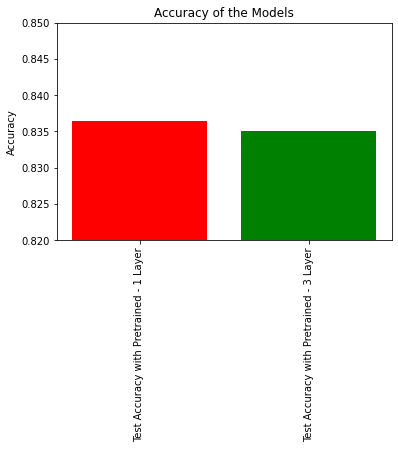

In [84]:
class Network(torch.nn.Module):
    def __init__(self,pad_idx):
        super().__init__()
        self.embedding =torch.nn.Embedding(num_embeddings = len(TEXT_C.vocab), embedding_dim =100,padding_idx = pad_idx)##Fill Here ## create an embedding layer with 100 size
        self.layer1 = torch.nn.Linear(max_size*100, 250)##Fill Here ##
        self.layer2 = torch.nn.Linear(250,100)
        self.layer3 = torch.nn.Linear(100,1)

    def forward(self, x):
        x = self.embedding(x).view(x.size(0),-1)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x     

model = Network(pad_idx = TEXT_C.vocab.stoi[TEXT.pad_token])
print(model)

model.embedding.weight.data.copy_(TEXT_C.vocab.vectors)
model.embedding.weight.data[TEXT_C.vocab.stoi[TEXT_C.unk_token]] = torch.zeros(100)
model.embedding.weight.data[TEXT_C.vocab.stoi[TEXT_C.pad_token]] = torch.zeros(100)

model.embedding.requires_grad = False

# Choose a Loss function from torch.nn according to your network
loss_fn = torch.nn.BCEWithLogitsLoss()##Fill here## 
#Define an Adam optimizer with learning rate 0.001 to optimize the parameters of our network
optimizer = torch.optim.Adam(params= model.parameters(),lr= 0.001) ## Fill here##

model = model.to(device)
loss_fn = loss_fn.to(device)

import time
# Training loop
N_EPOCHS = 2

tr_loss = []
model.train()

for epoch in range(N_EPOCHS):
    
    # Calculate training time
    start_time = time.time()

    epoch_loss = 0
    epoch_acc = 0

    
    batch_no = 0
    for batch in train_iterator:
        predictions = model(batch.text).squeeze(1)
        loss = loss_fn(predictions, batch.label.squeeze(0))
        ###Fill Here###
        # Reset the gradients
        optimizer.zero_grad()
        # Backprop 
        loss.backward()
        # Optimize the weights
        optimizer.step()
        ##################################

        # Record accuracy and loss
        epoch_loss += loss.item()

        acc =   accuracy_fn(predictions,batch.label.squeeze(0)) 
        epoch_acc +=acc.item()

        batch_no = batch_no +1
        

    
    train_loss = epoch_loss / len(train_iterator)

    end_time = time.time()

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    
    print('\n')    
    print(f'Epoch: {epoch+1:2} | Epoch Time: {elapsed_mins}m {elapsed_secs}s')
    print(f'\tAvarage Train Loss: {train_loss:.3f} ')
    print('\n') 

## Pretrained weights test
test_epoch_loss = 0
test_epoch_acc = 0

# Turm on evalutaion mode
model.eval()

# No need to backprop in eval
with torch.no_grad():

    for batch in test_iterator:

        test_predictions = model(batch.text).squeeze(1)
        
        test_loss = loss_fn(test_predictions, batch.label)

        test_epoch_loss += test_loss.item()
        
        acc = accuracy_fn(test_predictions,batch.label.squeeze(0))
        test_epoch_acc +=acc.item()

test_loss = test_epoch_loss/len(test_iterator)
test_acc_pretrain_deep = test_epoch_acc  / len(test_iterator)
print(f'Test Loss: {test_loss:.3f} | | Test Acc: {test_acc_pretrain_deep*100:.2f}%')

left = [1, 2]
  
height = [test_acc_pretrain, test_acc_pretrain_deep]
  
# labels for bars
tick_label = ['Test Accuracy with Pretrained - 1 Layer','Test Accuracy with Pretrained - 3 Layer']
plt.xticks(rotation=90)

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.ylim([0.82, 0.85])
plt.ylabel("Accuracy")
plt.title("Accuracy of the Models")

Deeper network has increased accuracy a little bit however training time has increased too much 